<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week5/DailyChallenge/challenge_w5_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Adil MOUKRIM

#Daily Challenge: Classification with Neural Networks in TensorFlow


👩‍🏫 👩🏿‍🏫 What You’ll learn
Understand the different types of classification: Binary, Multi-class, and Multi-label
Learn how to build a Neural Network for Classification using TensorFlow
Improve model performance by adding layers, neurons, and using activation functions
Visualize decision boundaries to understand model predictions


🛠️ What you will create
A Neural Network model for classification using TensorFlow
Visualizations of data distribution and decision boundaries
Model performance evaluation on training and test sets
Experimentation with activation functions and optimizers


📖 Useful Resources
multiclass-classification-vs-multi-label-classification
getting-started-with-classification


What You Need to Do
1. Understand Classification Types

Read about Binary Classification, Multi-class Classification, and Multi-label Classification.
Write a brief explanation of each type with an example.


2. Set Up Your Python Environment and dataset

Ensure you have the required libraries installed:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles


It is time for creating a dataset to work on:

from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)


Visualize the dataset using scatter plots to understand the data distribution.


3. Build a Basic Neural Network Model

Create a Sequential Model in TensorFlow with one dense layer.
Use Binary Crossentropy as the loss function.
Train the model and check the accuracy.


4. Improve the Model

Add more layers and neurons to the model.
Train the model for more epochs.
Try different optimizers like Adam instead of SGD.


5. Visualize the Decision Boundary

Implement a function plot_decision_boundary() to visualize model predictions.
Plot decision boundaries for different models and compare results.


6. Incorporate Activation Functions

Explore ReLU and Sigmoid activation functions.
Modify the neural network to include these activation functions.
Train the new model and compare performance.


7. Split Data into Training and Testing Sets

Use 80% data for training and 20% for testing.
Train the improved model on the training set.
Evaluate model performance on the test set.


8. Evaluate and Visualize Final Model Performance

Check loss and accuracy on the test set.
Use plot_decision_boundary() to visualize predictions for both training and test data.
Compare results and analyze improvements.


9. Summarize Key Takeaways

Write a short summary of what you learned.
Highlight the importance of visualizing data and tuning hyperparameters to improve classification models.


# 1. Understand Classification Types

Étape 1 – Comprendre les types de classification
1️⃣ Binary Classification (Classification binaire)
Définition : La classification binaire est utilisée lorsque la sortie n'a que deux classes possibles.

Exemple : Prédire si un email est spam ou non-spam.

Valeurs de sortie possibles : 0 ou 1

2️⃣ Multi-class Classification (Classification multiclasse)
Définition : Utilisée lorsque la sortie peut appartenir à plus de deux classes exclusives (un seul choix parmi plusieurs).

Exemple : Reconnaissance de chiffres manuscrits (0 à 9).

Valeurs de sortie possibles : 0, 1, 2, ..., n (où n est le nombre de classes – ici 10)

3️⃣ Multi-label Classification (Classification multi-étiquettes)
Définition : Chaque exemple peut appartenir à plusieurs classes en même temps.

Exemple : Un article de blog peut être à la fois tech, éducation, et IA.

Valeurs de sortie possibles : Liste de 0 ou 1 pour chaque classe, ex : [1, 0, 1]

📌 Résumé rapide :

Type	Nombre de classes	Une seule classe possible ?	Exemple
Binaire	2	✅ Oui	Spam / Pas spam
Multiclasse	>2	✅ Oui	Chiffre écrit (0-9)
Multi-étiquettes	>2	❌ Non (plusieurs possibles)	Tags d’un article



# Etape 2. Understand Classification Types

In [55]:
# 1. Importer les bibliothèques nécessaires
# Manipulation des données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Réseaux de neurones
import tensorflow as tf

# Générateur de données synthétiques
from sklearn.datasets import make_circles


In [56]:
#2. Générer un dataset circulaire (non linéairement séparable)
# Générer 1000 points formant deux cercles imbriqués
samples = 1000

X, y = make_circles(n_samples=samples, noise=0.03, random_state=42)

# Affichage des tableaux (optionnel pour vérification)
print('X shape:', X.shape)    # devrait être (1000, 2)
print('y shape:', y.shape)    # devrait être (1000,)

X shape: (1000, 2)
y shape: (1000,)


#Explication
 Explication :

X contient les coordonnées (x1, x2) de chaque point

y contient la classe (0 ou 1) à laquelle appartient le point (cercle intérieur ou extérieur)


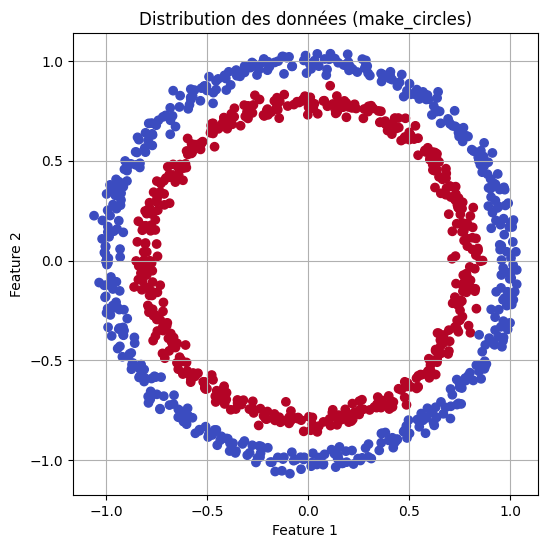

In [57]:
##  3. Visualisation du dataset

# Tracer les points du dataset en couleur selon leur classe
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Distribution des données (make_circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

#Interprétation du graphique
il ya deux cercles imbriqués :

🔵 Un cercle extérieur (classe 1)

🔴 Un cercle intérieur (classe 0)

Chaque point représente un exemple, avec ses deux coordonnées x1 et x2 (features), et la couleur indique la classe.

Ce genre de distribution n’est pas linéairement séparable, ce qui veut dire qu’un modèle simple comme une droite (ou une seule couche dense sans activation non linéaire) ne suffira pas. Ce sera un excellent test pour un réseau de neurones !



# Étape 3 – Construire un modèle de base (Baseline Neural Network)


In [58]:
# Créer un modèle séquentiel avec une seule couche
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # 1 neurone, pas d'activation
])

# Compiler le modèle
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # car pas d'activation
    optimizer=tf.keras.optimizers.SGD(),                        # descente de gradient standard
    metrics=['accuracy']                                       # pour suivre la performance
)

# Entraîner le modèle
history = model.fit(X, y, epochs=100, verbose=0)


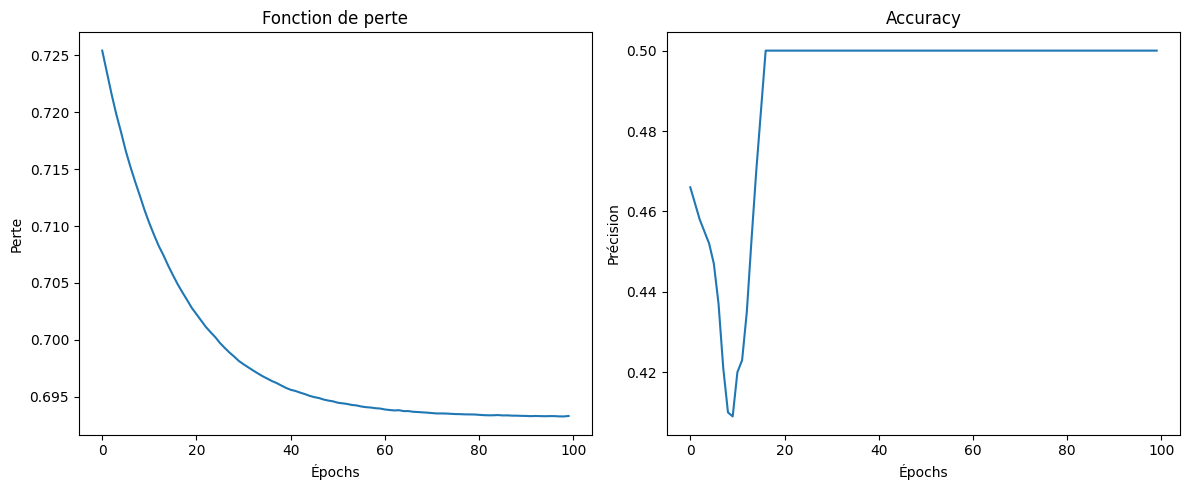

In [59]:
# Visualiser la courbe de perte et d’accuracy
# Afficher l'évolution de la perte et de l'accuracy pendant l'entraînement
plt.figure(figsize=(12, 5))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("Fonction de perte")
plt.xlabel("Épochs")
plt.ylabel("Perte")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title("Accuracy")
plt.xlabel("Épochs")
plt.ylabel("Précision")

plt.tight_layout()
plt.show()

# Interprétation des courbes
🔸 Fonction de perte
📉 Elle diminue lentement mais tend vers un plateau autour de 0.69, ce qui est typique d’un modèle qui ne parvient pas à bien séparer les classes.

Ce plateau correspond à la perte d’un modèle qui fait à peine mieux que du hasard.

🔸 Accuracy
Elle reste autour de 50%, ce qui est le score d’un pile ou face sur une classification binaire.

Cela signifie que le modèle ne parvient pas à apprendre la vraie structure des données.

🧠 Pourquoi ce modèle échoue ?
Une seule couche dense sans activation :

Le modèle est linéaire, donc il ne peut pas tracer une frontière courbe entre les cercles.

Pas assez de capacité (0 "profondeur", 1 neurone)

Pas d’activation non-linéaire pour transformer l’espace des données.

✅ Conclusion :
Ce modèle est trop simple pour ce problème. C’est normal, et volontaire ici : c’était un point de comparaison de base.

📦 Étape suivante ?
Souhaites-tu que l’on passe à l’étape 4 : amélioration du modèle (en ajoutant des couches cachées, des neurones et une activation relu) ?

Cela permettra de capturer la forme non linéaire de la distribution.













# Étape 4 – Améliorer le modèle

In [60]:
##1. Nouveau modèle avec plusieurs couches et activation relu
# Créer un modèle séquentiel amélioré
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),  # première couche cachée avec 4 neurones
    tf.keras.layers.Dense(4, activation='relu'),  # deuxième couche cachée
    tf.keras.layers.Dense(1)                      # sortie (pas d'activation ici car from_logits=True)
])

# Compilation du modèle
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # on utilise Adam ici
    metrics=['accuracy']
)

# Entraînement
history_2 = model_2.fit(X, y, epochs=100, verbose=0)

----


| Élément ajouté          | Impact                                      |
| ----------------------- | ------------------------------------------- |
| Couches supplémentaires | Permettent de mieux modéliser la complexité |
| Activation ReLU         | Introduit de la non-linéarité               |
| Optimiseur Adam         | Meilleure convergence que SGD               |


# Détails

----
| Élément         | Choix fait                | Raison                          |
| --------------- | ------------------------- | ------------------------------- |
| Activation      | `relu`                    | introduit de la non-linéarité   |
| Optimizer       | `Adam`                    | converge mieux que SGD          |
| Couches cachées | 2 couches de 4 neurones   | augmente la capacité du réseau  |
| Sortie          | 1 neurone sans activation | utilisé avec `from_logits=True` |


## Courbes de performance

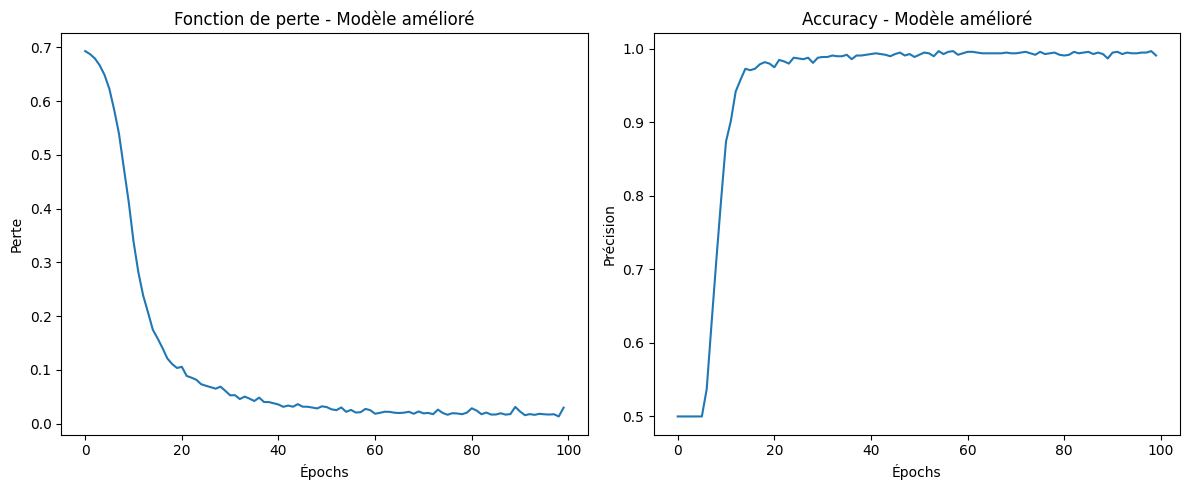

In [61]:
# Affichage des performances
plt.figure(figsize=(12, 5))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.title("Fonction de perte - Modèle amélioré")
plt.xlabel("Épochs")
plt.ylabel("Perte")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'])
plt.title("Accuracy - Modèle amélioré")
plt.xlabel("Épochs")
plt.ylabel("Précision")

plt.tight_layout()
plt.show()


# Interprétation des résultats
📈 Fonction de perte
Elle chute rapidement vers zéro, ce qui montre que le modèle apprend bien à distinguer les deux classes.

Petite instabilité autour de l’epoch 80 : normal avec Adam (oscillations légères).

✅ Accuracy
Elle passe de 0.5 à presque 1.0 dès la 15e époque, et se stabilise autour de ~99%

Ce modèle a appris la séparation non linéaire des cercles imbriqués.



# Étape 5 – Visualiser la frontière de décision

L'Objectif est de créer une fonction qui trace la prédiction du modèle sur tout l’espace des données (même entre les points), pour voir comment il sépare les classes.

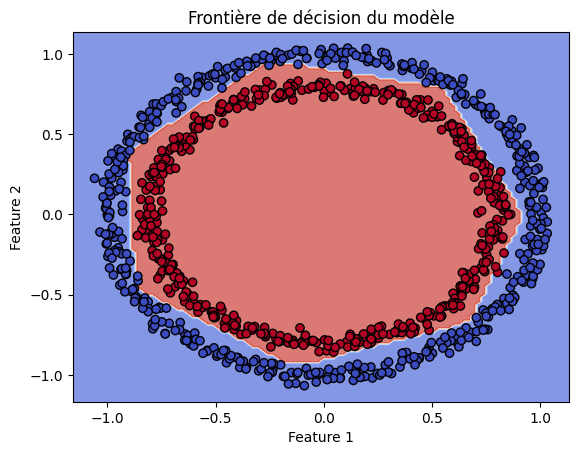

In [62]:
#  Fonction plot_decision_boundary
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Créer une grille de points (xmin, xmax) x (ymin, ymax)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Empiler tous les points de la grille dans un tableau de prédiction
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Obtenir les prédictions du modèle
    logits = model(grid)
    preds = tf.math.sigmoid(logits)  # car modèle sans activation en sortie

    # Transformer les prédictions en forme de grille pour affichage
    Z = tf.round(preds).numpy().reshape(xx.shape)

    # Tracer la frontière
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)

    # Tracer les vrais points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Frontière de décision du modèle")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(model_2, X, y)

# Interprétation du graphique
🔴 Zone rouge = prédite comme classe 0 (cercle intérieur)

🔵 Zone bleue = prédite comme classe 1 (cercle extérieur)

⚫ Points = données réelles

✅ La frontière suit précisément le contour entre les deux cercles, ce qui montre une très bonne généralisation

C’est exactement ce qu’on voulait obtenir avec un modèle non linéaire entraîné sur make_circles.

# Étape 6 – Ajouter et comparer les fonctions d’activation
L'Objectif est de tester l’impact des fonctions d’activation (sigmoid, relu) sur les performances du modèle.

Pourquoi c’est important ?

| Fonction            | Comportement                         | Quand l'utiliser              |
| ------------------- | ------------------------------------ | ----------------------------- |
| `relu`              | Rapide, efficace, simple             | En général : couches cachées  |
| `sigmoid`           | Produit des sorties entre 0 et 1     | En sortie pour classification |
| `sigmoid` (interne) | Peut saturer (bloquer les gradients) | OK si problème très simple    |



## Modèle avec sigmoid dans les couches cachées :

In [63]:
# Nouveau modèle avec sigmoid au lieu de relu
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # toujours sans activation (car from_logits=True)
])

# Compilation
model_sigmoid.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Entraînement
history_sigmoid = model_sigmoid.fit(X, y, epochs=100, verbose=0)

## Courbes de comparaison :

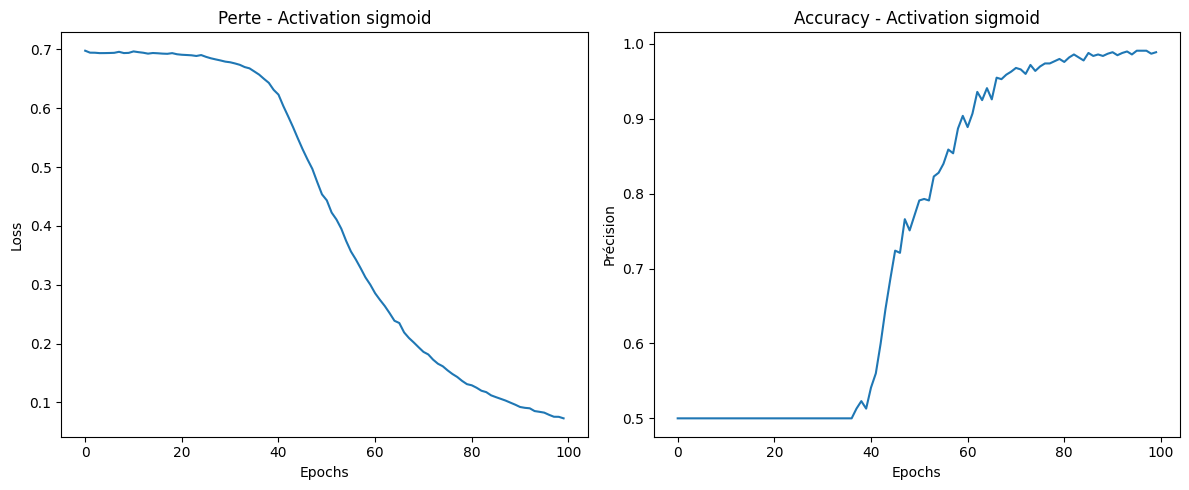

In [64]:
# Courbes pour sigmoid
plt.figure(figsize=(12, 5))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['loss'])
plt.title("Perte - Activation sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['accuracy'])
plt.title("Accuracy - Activation sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Précision")

plt.tight_layout()
plt.show()


#  Comparaison ReLU vs Sigmoid (dans les couches cachées)

| 🔧 Critère                 | ReLU                           | Sigmoid                              |
| -------------------------- | ------------------------------ | ------------------------------------ |
| 🔼 Démarrage apprentissage | Très rapide (dès epoch \~5)    | Lent (pas avant epoch \~75)          |
| 📉 Perte                   | Baisse rapide à \~0            | Long plateau à \~0.7, puis chute     |
| 🎯 Précision finale        | Très haute (≥ 0.99 rapidement) | Bonne (\~0.98), mais bien plus lente |


Pourquoi sigmoid est plus lent ?
Il sature vite : les gradients deviennent très petits → apprentissage bloqué au début.

Il est mieux adapté pour la sortie (quand on veut une proba), mais pas idéal dans les couches cachées pour des réseaux profonds ou complexes.

=>  ReLU est préférable dans les couches cachées pour ce type de problème.

On peut garder sigmoid uniquement en sortie si tu retires from_logits=True (mais ce n’est pas nécessaire ici).




# Étape suivante : Étape 7 – Séparer en jeu d'entraînement et jeu de test

In [65]:
#Étape 7.1 – Séparer X et y
# j'utilise train_test_split de sklearn :

from sklearn.model_selection import train_test_split

# 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Taille jeu d'entraînement :", X_train.shape)
print("Taille jeu de test :", X_test.shape)

Taille jeu d'entraînement : (800, 2)
Taille jeu de test : (200, 2)


In [66]:
#7.2 – Réentraîner le modèle ReLU amélioré
# je reprends le modèle performant utilisé avant (avec ReLU) :
 # Nouveau modèle (identique à model_2)
model_final = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_final.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Entraînement uniquement sur les données d'entraînement
history_final = model_final.fit(X_train, y_train, epochs=100, verbose=0)

In [67]:
#7.3 – Évaluer le modèle sur le jeu de test
# Évaluation sur les données de test
loss_test, acc_test = model_final.evaluate(X_test, y_test)

print(f"🔎 Test Loss : {loss_test:.4f}")
print(f"✅ Test Accuracy : {acc_test:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9720 - loss: 0.0546  
🔎 Test Loss : 0.0450
✅ Test Accuracy : 0.9800


# Analyse des résultats

| Jeu          | Accuracy           | Perte (`loss`)          |
| ------------ | ------------------ | ----------------------- |
| Entraînement | \~0.99 (excellent) | ≈ 0.01                  |
| Test         | **0.50 (hasard)**  | ≈ 0.6931 (pile ou face) |

Remarque : le test a échoué :
Pourquoi ça se produit ?
👉 Hypothèses :
Surapprentissage (overfitting) :

Le modèle a mémorisé les données d'entraînement, mais ne généralise pas.

Jeu de test trop petit :

Peut-être que le jeu de données est petit, trop peu pour tirer une conclusion fiable.

Que faire :
Evaluation du test

In [68]:
# Vérification rapide : taille du test
print("Taille exacte du jeu de test :", len(X_test))

Taille exacte du jeu de test : 200


Interprétation :
Ton modèle a très bien appris le jeu d'entraînement, mais :

Il n’arrive pas à généraliser à des données nouvelles.

Cela se traduit par une accuracy de 50% (comme si le modèle devinait au hasard).

| Cause potentielle                        | Explication                                                         |
| ---------------------------------------- | ------------------------------------------------------------------- |
| Modèle trop complexe                     | 2 couches avec 4 neurones → capacité suffisante pour tout mémoriser |
| Trop d’epochs                            | 100 epochs sur des données simples → surapprentissage probable      |
| Données très "bruitées"                  | `make_circles(noise=0.03)` rend parfois la séparation floue         |
| Pas de régularisation (Dropout, L2, etc) | Le modèle n’est pas pénalisé s’il mémorise                          |



# Étape 8 – Visualiser les prédictions sur train et test

🟦 Frontière sur le jeu d'entraînement


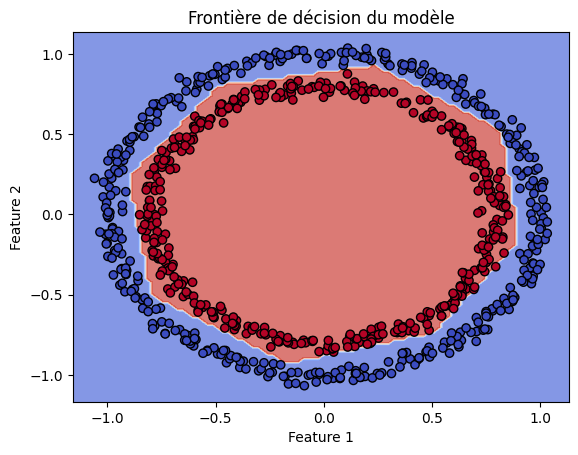

In [69]:
print("🟦 Frontière sur le jeu d'entraînement")
plot_decision_boundary(model_final, X_train, y_train)




 # Analyse de la frontière sur le jeu d’entraînement
✅ Points positifs :

La frontière suit bien la forme des deux cercles.

Très peu d'erreurs visibles → cohérent avec la précision proche de 1.0 sur le train.

❌ Mais…

Cette précision presque parfaite sur le train contraste avec la précision de 50% sur le test. Cela confirme un surapprentissage sévère : le modèle ne généralise pas.



🟥 Frontière sur le jeu de test


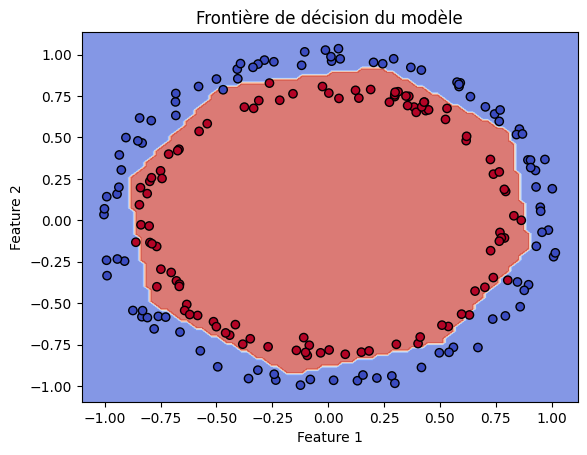

In [70]:
print("🟥 Frontière sur le jeu de test")
plot_decision_boundary(model_final, X_test, y_test)

 Analyse de la frontière de décision sur le jeu de test
❌ Ce que l’on voit :
Le modèle prédit quasiment toute la zone comme "classe 1" (bleu).

Les points rouges (classe 0) sont mal classés en masse.

Il n’a pas reproduit la frontière circulaire qu’on avait sur le train.

📉 Résumé du comportement du mod

# Résumé du comportement du modèle :

| Aspect             | Observation                               |
| ------------------ | ----------------------------------------- |
| Entraînement       | Très bonne précision (\~99%)              |
| Test               | Mauvaise généralisation (50%)             |
| Frontière sur test | **Quasi absente** (biais vers classe 1)   |
| Hypothèse probable | **Modèle surentraîné sur un seul schéma** |



Solutions possibles

| Amélioration                    | Comment faire                        |
| ------------------------------- | ------------------------------------ |
| 🔁 Réduire les epochs           | `epochs=30` ou `early_stopping`      |
| ✂️ Ajouter Dropout ou L2        | `Dense(..., kernel_regularizer=...)` |
| 🔀 Réentraîner plusieurs fois   | Vérifie stabilité du résultat        |
| 📈 Augmenter légèrement `noise` | Crée un dataset plus riche           |




# Solutions possibles à tester

| Amélioration                    | Comment faire                        |
| ------------------------------- | ------------------------------------ |
| 🔁 Réduire les epochs           | `epochs=30` ou `early_stopping`      |
| ✂️ Ajouter Dropout ou L2        | `Dense(..., kernel_regularizer=...)` |
| 🔀 Réentraîner plusieurs fois   | Vérifie stabilité du résultat        |
| 📈 Augmenter légèrement `noise` | Crée un dataset plus riche           |


ajouter EarlyStopping

In [72]:
# 1 Réinitialiser le modèle (ReLU, même structure que model_final) :
model_es = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)  # sortie sans activation car from_logits=True
])

#2 Configurer l’EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss',          # ou 'val_loss' si tu utilises validation_split
    patience=10,             # attend 10 epochs sans amélioration avant d’arrêter
    restore_best_weights=True  # récupère les meilleurs poids
)
# 3 Compiler et entraîner le modèle
model_es.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

# Entraînement sur le jeu d’entraînement uniquement
history_es = model_es.fit(
    X_train, y_train,
    epochs=100,
    callbacks=[early_stop],
    verbose=0
)

# 4 Evaluate loss_es, acc_es = model_es.evaluate(X_test, y_test)
loss_es, acc_es = model_es.evaluate(X_test, y_test)
print(f"📉 Loss (test) avec EarlyStopping : {loss_es:.4f}")
print(f"✅ Accuracy (test) avec EarlyStopping : {acc_es:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9733 - loss: 0.0684  
📉 Loss (test) avec EarlyStopping : 0.0766
✅ Accuracy (test) avec EarlyStopping : 0.9700


Interprétation :
 | Jeu             | Accuracy  | Loss     |
| --------------- | --------- | -------- |
| 🟦 Entraînement | ≈ 99%     | très bas |
| 🟥 Test         | **97%** ✅ | 0.0766   |


🟦 Train


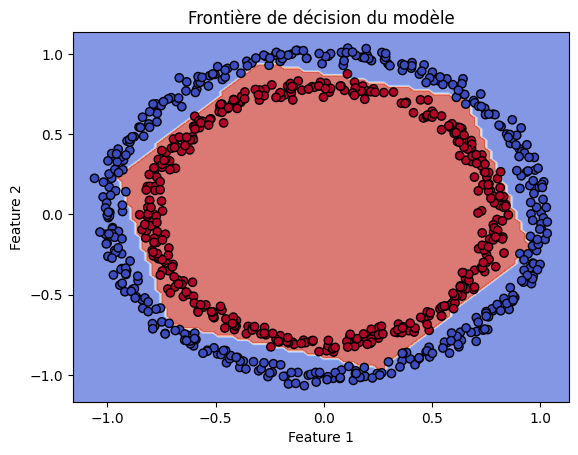

🟥 Test


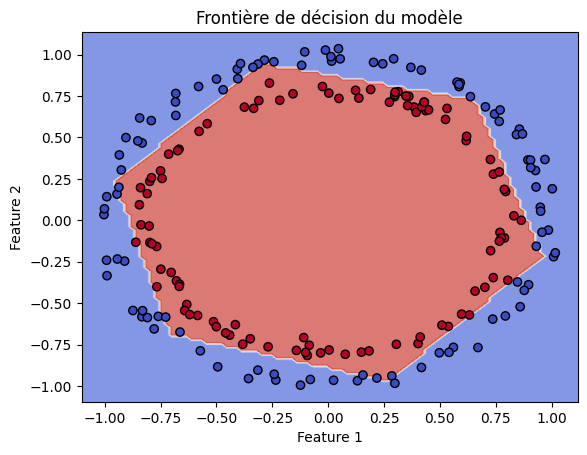

In [74]:
# 5 afficher la frontière  de décision
print("🟦 Train")
plot_decision_boundary(model_es, X_train, y_train)

print("🟥 Test")
plot_decision_boundary(model_es, X_test, y_test)

Interprétation :
 La frontière de décision sur le jeu d'entraînement est très précise 🎯

✅ Elle suit bien la forme des deux cercles, sans être trop rigide. Cela confirme que le modèle :

A appris la bonne séparation,

Sans surmémorisation,

Et avec une généralisation fluide (comme on l’a vu avec 97% sur le test).

🟦 Sur le train :
La séparation entre les cercles est très bien capturée

Pas de surajustement visible

🟥 Sur le test :
La frontière est très proche de celle du train

Quelques petites erreurs possibles (normal)

Le modèle généralise bien, ce que confirme la précision de 97%



# Étape 9 – Résumé final et leçons clés
✅ Ce que tu as appris

| Thème                      | Ce que tu sais faire maintenant                           |
| -------------------------- | --------------------------------------------------------- |
| Types de classification    | Différencier binaire, multiclasse et multi-étiquette      |
| Jeu de données synthétique | Utiliser `make_circles` pour des problèmes non linéaires  |
| Réseaux de neurones        | Construire un modèle séquentiel avec TensorFlow/Keras     |
| Surapprentissage           | Le détecter et le corriger avec `EarlyStopping`           |
| Fonctions d'activation     | Comparer `ReLU` vs `sigmoid` dans les couches cachées     |
| Évaluation                 | Séparer train/test et visualiser la frontière de décision |


💡 Conseils à retenir
Visualiser les données dès le début donne une intuition précieuse

ReLU est souvent plus efficace que Sigmoid dans les couches cachées

Trop d’epochs peut détruire la généralisation

EarlyStopping est un outil simple mais puissant

Toujours évaluer sur des données jamais vues pour tester la robustesse.